In [1]:
from utils import *

# Linear Classification
The Class for linear and logistic classification is the same one as the one for linear regression

In [2]:
df, train, test, val = get_data(normalize=True, binary_label=True)

In [3]:
from sklearn.linear_model import SGDClassifier

In [4]:
def _sigmoid(x):
    return 1 / (1 + np.exp(-x))


class ScratchLinearRegression:

    def __init__(self, lr=0.01, n_iters=1000, regularization=None, alpha=0.1, l1_ratio=0.5, logistic=False,
                 classification=True):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.regularization_param = alpha
        self.l1_ratio = l1_ratio
        self.classification = classification
        self.model = 'logistic' if logistic else 'perceptron'  #todo check

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            if self.classification:
                if self.model == 'logistic':
                    y_pred = _sigmoid(y_pred)
                else:
                    y_pred = np.where(y_pred >= 0, 1, 0)
            if self.regularization == 'l1':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + np.sign(self.weights) * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + np.sign(self.bias) * self.regularization_param

            elif self.regularization == 'l2':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.weights * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + 2 * self.bias * self.regularization_param
            elif self.regularization == 'elasticnet':
                dw = ((1 / n_samples) * np.dot(X.T, (y_pred - y))
                      + 2 * self.weights * (1 - self.regularization_param)
                      + np.sign(self.weights) * self.regularization_param)
                db = ((1 / n_samples) * np.sum(y_pred - y)
                      + 2 * self.bias * (1 - self.regularization_param)
                      + np.sign(self.bias) * self.regularization_param)
            elif self.regularization == 'elasticnetV2':
                dw = (
                        (1 / n_samples) * np.dot(X.T, (y_pred - y))
                        + self.regularization_param *
                        (
                                2 * self.weights * (1 - self.l1_ratio)
                                + np.sign(self.weights) * self.l1_ratio
                        )
                )
                db = (
                        (1 / n_samples) * np.sum(y_pred - y)
                        + self.regularization_param *
                        (
                                2 * self.bias * (1 - self.l1_ratio)
                                + np.sign(self.bias) * self.l1_ratio
                        )
                )
            elif self.regularization is None or self.regularization == '':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
            else:
                raise ValueError('Invalid regularization parameter')

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias

        if self.classification:
            if self.model == 'logistic':
                y_pred = _sigmoid(y_pred)
                y_pred = [1 if i >= 0.5 else 0 for i in y_pred]
            else:
                y_pred = [1 if i >= 0 else 0 for i in y_pred]
        return y_pred

## No regularization

### Sklearn

In [12]:
regressor = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.001,
                          early_stopping=False, loss='perceptron')
accuracy_LC_NR_sk = test_model(regressor, train, test, classification=True)

Time taken to train the model:  0.017316579818725586
Binary cross entropy: 16.48307317302797
Accuracy: 0.5426913860512045


### Scratch

In [45]:
#No regularization
regressor = ScratchLinearRegression(regularization='', classification=True)
accuracy_LC_NR_my = test_model(regressor, train, test, classification=True)

Time taken to train the model:  2.3608081340789795
Binary cross entropy: 15.078420770803579
Accuracy: 0.5816622524908563


## L1 Regularization

L1 Regularization does not benefit the model

Trying hyperparameters: 0
Time taken to train the model:  2.5634851455688477
Binary cross entropy: 14.598162629141095
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 1e-05
Time taken to train the model:  1.5271072387695312
Binary cross entropy: 14.598162629141095
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 0.0005
Time taken to train the model:  1.510301113128662
Binary cross entropy: 14.660669358966144
Accuracy: 0.59325240422513
Value: 0.59325240422513
Trying hyperparameters: 0.001
Time taken to train the model:  1.4634270668029785
Binary cross entropy: 14.677716648918432
Accuracy: 0.5927794419044616
Value: 0.5927794419044616
Trying hyperparameters: 0.01
Time taken to train the model:  1.3723118305206299
Binary cross entropy: 15.143675907614254
Accuracy: 0.5798518051395238
Value: 0.5798518051395238
Best hyperparameters: 0
Best value: 0.5949865994009144


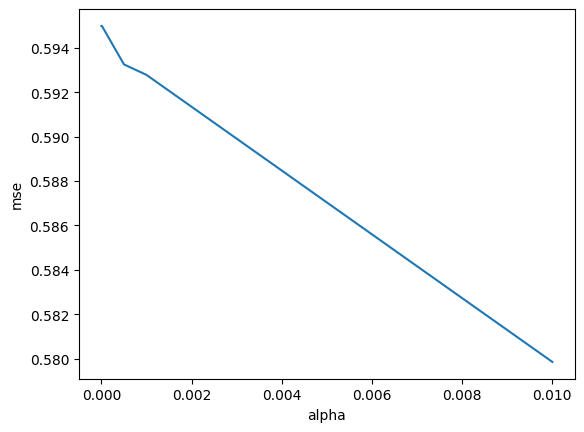

Time taken to train the model:  1.227055549621582
Binary cross entropy: 15.078420770803579
Accuracy: 0.5816622524908563
Best rmse for Linear Classification L1 (scratch): 0.5816622524908563 with alpha=0


In [53]:
def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param, classification=True)

best_param, params, accuracies = optimize_hyperparameters(get_model, (0,0.00001,0.0005,0.001,0.01), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param, classification=True)

accuracy_LC_L1_my = test_model(regressor, train, test, classification=True)
print(f"Best rmse for Linear Classification L1 (scratch): {accuracy_LC_L1_my} with alpha={best_param}")


## L2

Trying hyperparameters: 0
Time taken to train the model:  1.935549259185791
Binary cross entropy: 14.598162629141095
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 1e-05
Time taken to train the model:  1.4412131309509277
Binary cross entropy: 14.592480199156999
Accuracy: 0.5951442535078039
Value: 0.5951442535078039
Trying hyperparameters: 0.0005
Time taken to train the model:  1.427668571472168
Binary cross entropy: 14.609527489109286
Accuracy: 0.5946712911871355
Value: 0.5946712911871355
Trying hyperparameters: 0.001
Time taken to train the model:  1.4226913452148438
Binary cross entropy: 14.609527489109286
Accuracy: 0.5946712911871355
Value: 0.5946712911871355
Trying hyperparameters: 0.01
Time taken to train the model:  1.2707774639129639
Binary cross entropy: 14.60384505912519
Accuracy: 0.5948289452940249
Value: 0.5948289452940249
Best hyperparameters: 1e-05
Best value: 0.5951442535078039


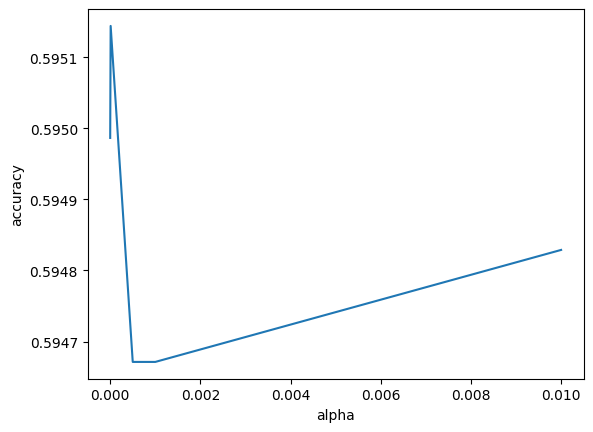

Time taken to train the model:  1.2300090789794922
Binary cross entropy: 15.073874970149133
Accuracy: 0.5817883717997225
Best accuracy for Linear Regression L2 (scratch): 0.5817883717997225 with alpha=1e-05


In [58]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param, classification=True,lr=0.1)


def iterate_hyperparameters():
    alpha = 0.00001
    while alpha < 1:
        yield alpha
        alpha *=10


best_param, params, accuracies = optimize_hyperparameters(get_model, (0,0.00001,0.0005,0.001,0.01), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'accuracy')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param, classification=True)

accuracy_LC_L2_my = test_model(regressor, train, test, classification=True)
print(f"Best accuracy for Linear Regression L2 (scratch): {accuracy_LC_L2_my} with alpha={best_param}")

L1 and L2 regularization does not benefit the model therefore is useless to test elasticnet

# Logistic Classifier

## No Regularization

### Sklearn

In [87]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(max_iter=1000, penalty=None)
accuracy_LO_NR_sk=test_model(regressor, train, test, classification=True)

/home/vmcvastry/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(


Time taken to train the model:  1.597651720046997
Binary cross entropy: 12.673692224600657
Accuracy: 0.6483793668810695


In [99]:
regressor = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.0005,
                          early_stopping=False, loss='log_loss')
accuracy_LO_NR_sk=test_model(regressor, train, test, classification=True)


Time taken to train the model:  0.05865907669067383
Binary cross entropy: 12.637325819365074
Accuracy: 0.649388321351999


### Scratch

In [72]:
#No regularization
regressor = ScratchLinearRegression(regularization='', logistic=True, classification=True,lr=0.9)
accuracy_LO_NR_my = test_model(regressor, train, test, classification=True)

Time taken to train the model:  2.0831942558288574
Binary cross entropy: 12.610051015438387
Accuracy: 0.6501450372051961


Trying hyperparameters: 0.1
Time taken to train the model:  2.4571425914764404
Binary cross entropy: 12.319508205518838
Accuracy: 0.6582058962635977
Value: 0.6582058962635977
Trying hyperparameters: 0.2
Time taken to train the model:  1.9314911365509033
Binary cross entropy: 12.222906895789215
Accuracy: 0.660886016080719
Value: 0.660886016080719
Trying hyperparameters: 0.30000000000000004
Time taken to train the model:  1.684640645980835
Binary cross entropy: 12.188812315884642
Accuracy: 0.6618319407220558
Value: 0.6618319407220558
Trying hyperparameters: 0.4
Time taken to train the model:  1.722099781036377
Binary cross entropy: 12.131988016043687
Accuracy: 0.6634084817909507
Value: 0.6634084817909507
Trying hyperparameters: 0.5
Time taken to train the model:  1.5425403118133545
Binary cross entropy: 12.15471773598007
Accuracy: 0.6627778653633927
Value: 0.6627778653633927
Trying hyperparameters: 0.6
Time taken to train the model:  1.618786334991455
Binary cross entropy: 12.15471773598

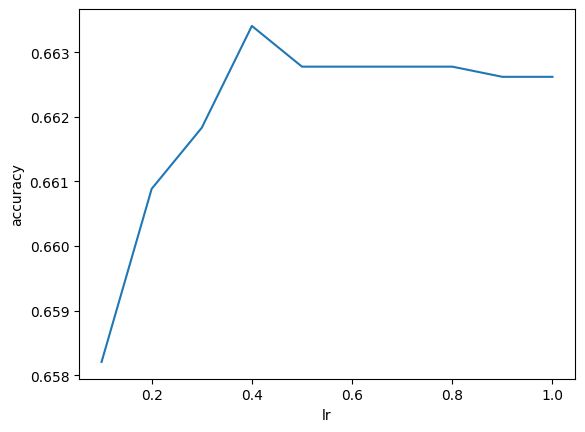

Time taken to train the model:  1.670142412185669
Binary cross entropy: 12.632780018710626
Accuracy: 0.6495144406608652
Best accuracy for Logistic Classification (scratch): 0.6495144406608652 with lr=0.4


In [74]:
def get_model(param):
    return  ScratchLinearRegression(regularization='', logistic=True, classification=True,lr=param)


def iterate_hyperparameters():
    alpha = 0.1
    while alpha < 1:
        yield alpha
        alpha += 0.1


best_lr, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'lr', 'accuracy')
best_model = get_model(best_lr)

accuracy_LO_NR_my = test_model(best_model, train, test, classification=True)
print(f"Best accuracy for Logistic Classification (scratch): {accuracy_LO_NR_my} with lr={best_lr}")

## L1 Regularization

Trying hyperparameters: 0
Time taken to train the model:  1.9367907047271729
Binary cross entropy: 12.160400165964166
Accuracy: 0.6626202112565033
Value: 0.6626202112565033
Trying hyperparameters: 1e-05
Time taken to train the model:  1.686460256576538
Binary cross entropy: 12.160400165964166
Accuracy: 0.6626202112565033
Value: 0.6626202112565033
Trying hyperparameters: 0.0001
Time taken to train the model:  1.5976974964141846
Binary cross entropy: 12.188812315884642
Accuracy: 0.6618319407220558
Value: 0.6618319407220558
Trying hyperparameters: 0.001
Time taken to train the model:  1.7854092121124268
Binary cross entropy: 12.274048765646073
Accuracy: 0.6594671291187135
Value: 0.6594671291187135
Trying hyperparameters: 0.01
Time taken to train the model:  1.6837406158447266
Binary cross entropy: 12.393379795312077
Accuracy: 0.6561563928740344
Value: 0.6561563928740344
Best hyperparameters: 0
Best value: 0.6626202112565033


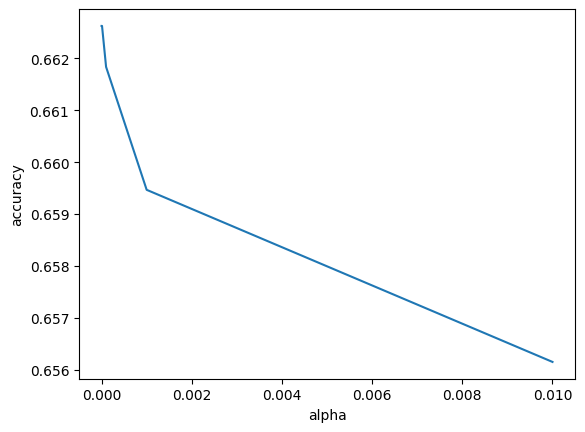

Time taken to train the model:  1.5569877624511719
Binary cross entropy: 12.610051015438387
Accuracy: 0.6501450372051961


0.6501450372051961

In [77]:
if not best_lr:
    best_lr = 0.9

def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param, classification=True, logistic=True,lr=best_lr)

best_param, params, accuracies = optimize_hyperparameters(get_model, (0,0.00001,0.0001,0.001,0.01), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'accuracy')
best_model = get_model(best_param)

test_model(best_model, train, test, classification=True)

Trying hyperparameters: 0
Time taken to train the model:  2.1393587589263916
Binary cross entropy: 12.671818864532753
Accuracy: 0.6484313416364497
Value: 0.6484313416364497
Trying hyperparameters: 1e-05
Time taken to train the model:  1.596395492553711
Binary cross entropy: 12.671818864532753
Accuracy: 0.6484313416364497
Value: 0.6484313416364497
Trying hyperparameters: 0.0001
Time taken to train the model:  1.5196549892425537
Binary cross entropy: 12.671818864532753
Accuracy: 0.6484313416364497
Value: 0.6484313416364497
Trying hyperparameters: 0.001
Time taken to train the model:  1.575193166732788
Binary cross entropy: 12.666136434548655
Accuracy: 0.6485889957433392
Value: 0.6485889957433392
Trying hyperparameters: 0.01
Time taken to train the model:  1.683340311050415
Binary cross entropy: 12.643406714612276
Accuracy: 0.6492196121708971
Value: 0.6492196121708971
Trying hyperparameters: 0.1
Time taken to train the model:  1.6509389877319336
Binary cross entropy: 12.694548584469134
Ac

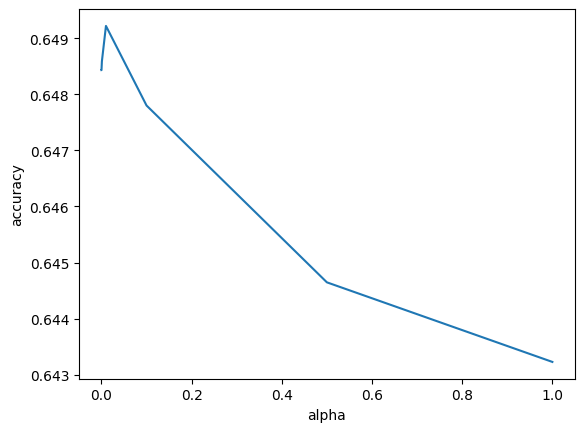

Time taken to train the model:  2.1155624389648438
Binary cross entropy: 12.800974642925198
Accuracy: 0.6448480262328162


0.6448480262328162

In [79]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param, classification=True, logistic=True)


def iterate_hyperparameters():
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, (0,0.00001,0.0001,0.001,0.01,0.1,0.5), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'accuracy')
best_model = get_model(best_param)

accuracy_LO_L2_my=test_model(best_model, train, test, classification=True)
print(f"Best accuracy for Logistic Classification L2 (scratch): {accuracy_LO_L2_my} with lr={best_param}")